# Noise Interferometry Test
This tests the functionality of the noise interferometry module of ooipy

## Sections
- Compute Cross Correlation for specified window

First, let's import all dependancies

In [1]:
import os
import sys
cwd = os.getcwd()
ooipy_dir = os.path.dirname(cwd) + '/ooipy'
sys.path.append(ooipy_dir)
from matplotlib import pyplot as plt
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
from ooipy.hydrophone import Noise_Interferometry as NI
import pickle
import scipy
from gwpy.timeseries import TimeSeries
import seaborn as sns
import gwpy
import progressbar

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Calculating NCF for 1 Average Period

In [2]:
# Create instance of NCF object
avg_time = 60 #minute
start_time = datetime.datetime(2017,3,10,0,0,0)
node1 = '/LJ01C'
node2 = '/PC01A'
filter_cutoffs = [20, 70]
W = 30

NCF0 = NI.NCF(avg_time, start_time, node1, node2, filter_cutoffs, W, verbose=True, whiten=True)
NCF0 = NI.calculate_NCF(NCF0)

plt.plot(NCF0.NCF)

   Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering and Whitening Data for Node 1...
   Filtering and Whitening Data for Node 2...
   Correlating Data...
   Time to Calculate NCF for 1 Average Period: 66.16511726379395 




# Loop Through 2 instances of NCF Calculation

In [6]:
NI.calculate_NCF_loop(2, node1, node2, 1, start_time, W,  filter_cutoffs, verbose=True, whiten=True)

Calculting NCF for Period 1:
   Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering and Whitening Data for Node 1...
   Filtering and Whitening Data for Node 2...
   Correlating Data...
   Time to Calculate NCF for 1 Average Period: 9.200584411621094 


Calculting NCF for Period 2:
   Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering and Whitening Data for Node 1...
   Filtering and Whitening Data for Node 2...
   Correlating Data...
   Time to Calculate NCF for 1 Average Period: 9.003805160522461 




# NCF_analysis toolset

2017-03-10 00:00:00
[ 1 90]
low_frequency
500
Central_Caldera
Axial_Base
90
sabra
zero phase filtering
Number of Available hours: 440
8.05e+08


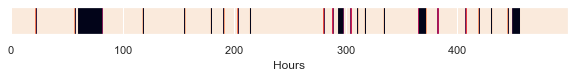

<Figure size 432x288 with 0 Axes>

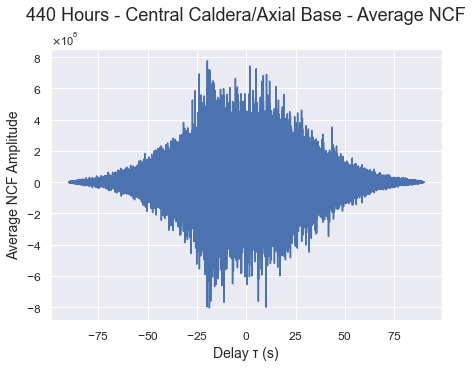

In [3]:
import NCF_analysis as NCF

exp1 = NCF.NCF_analysis('ckpts_8')

exp1.read_header()
exp1.available_hours()

fig2 = plt.figure()
xcorr = exp1.average_NCF(0,500, plot=True)

scientific_notation = "{:.2e}".format(np.max(np.abs(xcorr)))
print(scientific_notation)

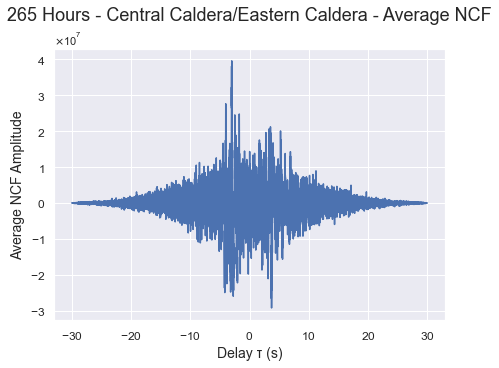

In [35]:
# Save Figure

exp1.NCF_plot(exp1.xcorr, exp1.num_available, save_fig=True,file_name = 'Central-Eastern-NCF', frequency=False)

In [ ]:
# Get spectrum of NCF



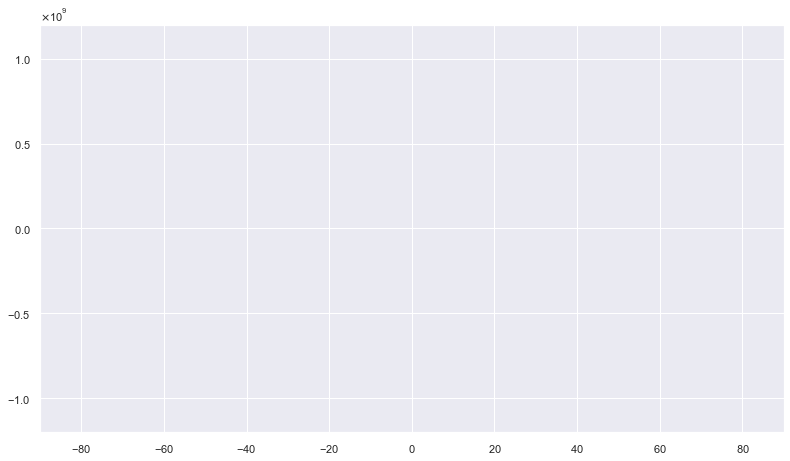

In [4]:
exp1.animate_NCF(500, 10, 'non_zero_phase-reverse', 1.2e+9, frequency=False)

# Comparing ckpts_1 and ckpts_5

2017-03-10 23:00:00
[ 1 90]
low_frequency
200
Central_Caldera
Axial_Base
90
sabra
2017-03-10 00:00:00
[10 90]
low_frequency
500
Central_Caldera
Axial_Base
90
sabra
non zero phase filtering
Number of Available hours: 170
Number of Available hours: 440


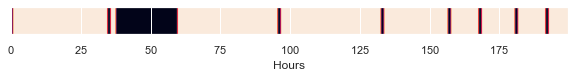

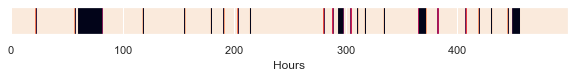

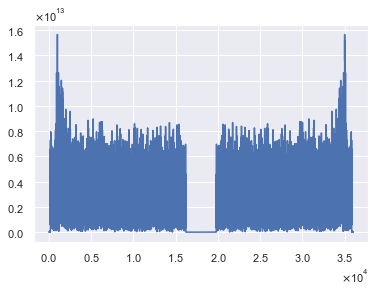

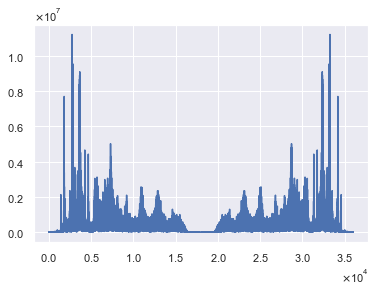

In [43]:
exp1 = NCF.NCF_analysis('ckpts_1')
exp5 = NCF.NCF_analysis('ckpts_6')
exp1.read_header()
exp5.read_header()
exp1.available_hours()
exp5.available_hours()

xcorr1 = exp1.average_NCF(0,500)
xcorr5 = exp5.average_NCF(0,500)

fig1 = plt.figure()
plt.plot(np.abs(scipy.fft.fft(xcorr1)))

fig2 = plt.figure()
plt.plot(np.abs(scipy.fft.fft(xcorr5)))

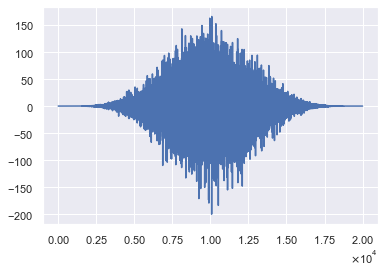

In [80]:
# playing around with Hann Windos

x1 = np.random.normal(size=(10000,1))
x2 = np.random.normal(size=(10000,1))

win = scipy.signal.hann(10000)

x1win = np.squeeze(x1)*win
x2win = np.squeeze(x2)*win

NCF = np.correlate(x1win, x2win, mode='full')

plt.plot(NCF)

# Debugging


Calculting NCF for Period 0: 2017-03-10 00:00:00 -             2017-03-10 01:00:00
   Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering Data from node 1
   Filtering Data from node 2
   Correlating Data...
   Time to Calculate NCF for 1 Average        Period: 14.054328918457031 




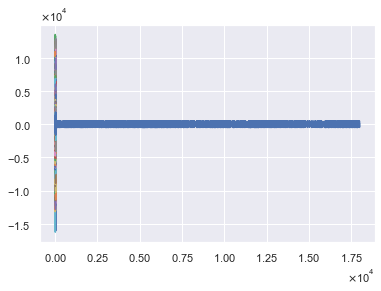

In [86]:
num_periods = 1 
avg_time = 60  #minutes
start_time = datetime.datetime(2017,3,10,0,0,0) # time of first sample
node1 = 'Central_Caldera'
node2 = 'Axial_Base'
filter_cutoffs = np.array([10, 90])
W = 90
htype = 'low_frequency'
whiten= True
kstart= 0
other_notes = 'non zero phase filtering'
sp_method = 'sabra'

NI.calculate_NCF_loop(num_periods, node1, node2, avg_time, start_time, W, filter_cutoffs, verbose=True, whiten=whiten, htype=htype, kstart=kstart, sp_method = sp_method, other_notes=other_notes)



TypeError: float() argument must be a string or a number, not 'type'

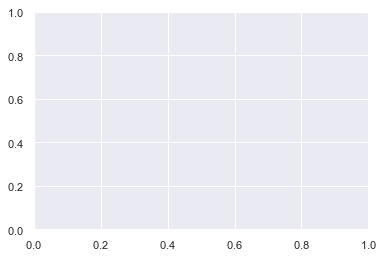